# **<center>Computational Physics Problem Set #1</center>**
### <center>Cameron Foltz</center>

### Exercise 2.5: Quantum Potential Step

In this problem we will calculate the Transmission and Reflection probabilities for a particle encountering a potential step.

The probabilities we will be working with are:

$T = \frac{4k_1k_2}{(k_1+k_2)^2}$ and $R = (\frac{k_1-k_2}{k_1+k_2})^2$

where $k_1 = \sqrt{2mE}/\hbar$ and $k_2 = \sqrt{2m(E-V)}/\hbar$

We will calculate both T and R with respect to the given values:

$m = 9.11\times10^{-31}$ kg

$V = 9$ eV

$E = 10$ eV

$\hbar = 6.582\times10^{-16}$ eV•s

In [1]:
import numpy as np
from scipy.constants import m_e
import timeit
import time
import matplotlib.pyplot as plt

In [22]:
# Set up the k1 and k2 equations

def prob(E, V, m):
    """This function takes in the value of Energy (E), 
    Potential Step (V), and the mass of the particle (m) 
    in order to return a list of the Reflection and Tranmission 
    probabilities (floats) with R being the first entry and T
    being the second"""
    k1 = np.sqrt(2*m*E)/hbar
    k2 = np.sqrt(2*m*(E-V))/hbar
    R = ((k1-k2)/(k1+k2))**2
    T = 4*k1*k2/(k1+k2)**2
    return [R, T]

# add in specific values and call function

E = 10 #[eV]
V = 9 #[eV]
m = m_e #[kg]
hbar = 6.582e-16 #[eV*s]

answer = prob(E,V,m)

# print the answer

print(f'The Reflection Probability is {answer[0]:4.2f}')
print(f'The Transmission Probability is {answer[1]:4.2f}')


The Reflection Probability is 0.27
The Transmission Probability is 0.73


### Exercise 2.6: Planetary Orbits

In this problem we will create a function that calculates the aphelion $l_2$, the velocity of the planet $v_2$ at $l_2$, and the orbital period $T$ and the Orbital eccentricity $e$

The function will take in values of the distance to the sun and the velocity $v_1$ at the perhilion $l_1$.

In order to do this the function must first find $v_2$ in terms of $l_1$ and $v_1$ which is given by the quadratic equation:

$v_2^2 - \frac{2GM}{v_1l_1}v_2-[v_1^2-\frac{2GM}{l_1}] = 0$

where the correct value of $v_2$ is the smaller of the two roots.

Once $v_2$ is known, we can use the equation

$l_2v_2 = l_1v_1$ 

or 

$l_2 = \frac{l_1v_1}{v_2}$

to solve for $l_2$ 

Once this is found, the function can then solve for the orbital eccentricity $e$ with the equation:

$e = \frac{l_2-l_1}{l_2+l_1}$

We will also solve for the Orbital period $T$, where

$T = \frac{2\pi ab}{l_1v_1}$

where
$a = \frac{1}{2}(l_1+v_1)$ and $b = \sqrt{l_1l_2}$

We will use the following values for constants:

$G = 6.6741\times10^{-11}$ $\frac{m^3}{kg s^2}$
and the mass of the sun $M = 1.9891\times10^{30}$ kg

In [21]:
# Setting up the function and define constants

def orbitalsolver(l1, v1):
    """This will take in the values l1 and v1 float values and output the apheliion 
    l2, the velocity at the aphelion v2, the orbital period T, and the orbital 
    eccentricity e.  The values are returned in a list of floats [l2, v2, T, e]"""
    G, M = 6.6741e-11, 1.9891e30
    quadratic = np.array([1, -2*G*M/(v1*l1), -v1**2 + 2*G*M/l1])
    roots = np.roots(quadratic)
    # make sure that the smallest value of v2 is being saved
    if roots[0] > roots[1]:
        v2 = roots[1]
    else:
        v2 = roots[0]
    # Calculate necessary values
    l2 = l1*v1/v2
    e = (l2-l1)/(l2+l1)
    T = np.pi*(l1+l2)*np.sqrt(l1*l2)/(l1*v1)
    return [l2, v2, T, e]

# plug in values for Earth and print answers
l1 = 1.4710e11
v1 = 3.0287e4
answer1 = orbitalsolver(l1,v1)

# diving by 3.154e7 seconds gives T in years
print(f'The Orbital Period of Earth is {answer1[2]/3.154e7:4.0f} year(s) and {answer1[2]//3.154e7:4.0f} days')
print(f'The Orbital eccentricity of Earth is {answer1[3]:4.4f}')
          
# plug in values for Halley's comment and print answers
l1 = 8.7830e10
v1 = 5.4529e4
answer2 = orbitalsolver(l1,v1)

print(f'The Orbital Period of Halley\'s Comet is {answer2[2]/3.154e7:4.0f} year(s) and {answer2[2]//3.154e7:4.0f} days')
print(f'The Orbital eccentricity of Halley\'s Comet is {answer2[3]:4.4f}')

The Orbital Period of Earth is    1 year(s) and    1 days
The Orbital eccentricity of Earth is 0.0164
The Orbital Period of Halley's Comet is   76 year(s) and   75 days
The Orbital eccentricity of Halley's Comet is 0.9672


### Exercise 2.9: The Madelung Constant

In this problem we will be calculating the Madelung constant for Sodium in a Sodium Chloride lattice.

In this setup, we will label the position of the element in the lattice by (i,j,k) with a sodium atom placed at the origin (0,0,0).  For this setup, whenever i+j+k is even, a sodium atom is at that position and whenever i+j+k is odd a Chlorine atom is at that position.  The distance of any atom from the origin is then:

$ D = a\sqrt{i^2+j^2+k^2}$

The sodium atoms have a single positive charge $+e$ while the chlorine atoms have a single negative charge $-e$.  We can then calculate the potential at the origin created by a single atom at position (i,j,k) with:

$V(i,j,k) = \pm\frac{e}{4\pi\epsilon_0D} = \pm\frac{e}{4\pi\epsilon_0a\sqrt{i^2+j^2+k^2}}$

where the $\pm$ sign is positive when i+j+k is positive and negative when i+j+k is negative. $\epsilon_0$ is the permittivity of the vacuum, where $\epsilon_0 = 8.854\times10^{-12}$ F/m and $a = 5.6402\times10^{-10}$ m for NaCl.

The Madelung constant is related to the total electric potential felt by an atom in a solid that is surrounding by L atoms, where:

$V_{total} = \sum_\limits{i,j,k=-L}^{L}V(i,j,k) = \frac{e}{4\pi\epsilon_0a}M$


where $M$ is the Madelung constant.  Technically the Madelung constant is the value when $L \rightarrow \infty$ but we will use a large value of L to get a good approximation of this constant.


We will create a function that calculates this Madelung Coefficient for a large L, but keeping the run time of the script around one minute or less.

In [11]:
# Madelung Constant Script
starttime = time.time()

# First we define our constants in SI units
eps = 8.854e-12
e = 1.6e-19 
a = 5.6402e-10
L = 120
Vtot = 0

# create a program that calculates the potential for every combination of (i,j,k)
for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            if (i+j+k)%2 == 0:
                e = -e
# make sure that there is no divide by zero error
            if (i**2 + j**2 + k**2) != 0:
                V = e/(4*np.pi*eps*a*np.sqrt(i**2 + j**2 + k**2))
                Vtot += V
            # reset e to the original value
            e = 1.6e-19

# Calculate M and print
M = Vtot*4*np.pi*eps*a/e
print(f'The Madelung Constant for NaCl is {M:4.3f}')


# Print run time of the program
endtime=time.time()
print(f'The run time was {endtime-starttime:4.2f} seconds')

The Madelung Constant for NaCl is 1.743
The run time was 47.40 seconds


### Exercise 3.6: Chaos

In this exercise we wish to display the behavior of the logistics map.  We will first do this by taking the equation:

$x' = rx(1-x)$

and after choosing a specific $r$ we will iterate this equation 1000 times, beginning with x = 1/2.  We will then iterate another 1000 times and plot the points in a scatter plot with r on the horizontal axis and x on the vertical axis.  We will repeat this for values of r from 1 to 4 with a step of 0.01.  We will then plot these values to create a Feigenbaum plot.


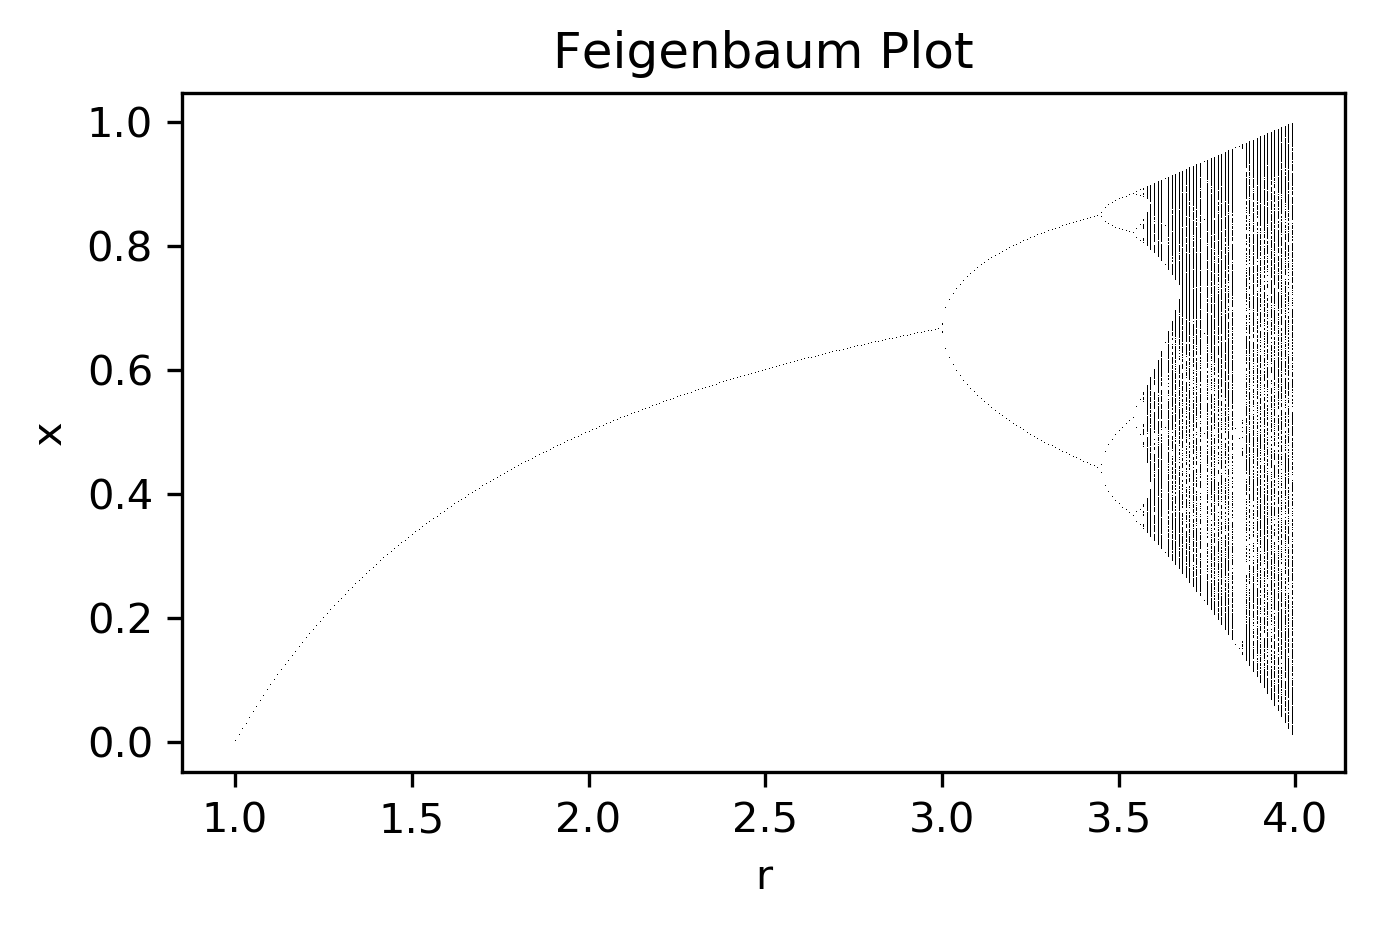

In [12]:
# create a set of R values for which to iterate
Rvalues = np.arange(1,4,.01)

# create blank arrays to later append
X = []
R =[]

# Set the number of beginning iterations to skip when plotting
iterSkip = 1000

for r in Rvalues:
    # set the initial condition
    x = 1/2
    # iterate over the beginning iterations + 1000 more
    for i in range(1000+iterSkip+1):
        # Only start to record values to plot
        # after iterSkip iterations have occured
        if i >= iterSkip:
            R.append(r)
            X.append(x)
        x = r*x*(1-x)

# plot the R and X values into figure 1 and format
plt.figure(1, [5,3], dpi=300)
plt.plot(R, X, marker =',', mfc='black', ls = '')
plt.ylabel("x")
plt.xlabel("r")
plt.title("Feigenbaum Plot")
plt.show()

#### Questions to answer:

#### a) What would a fixed point look like on the feigenbaum plot for a given r value? How about a limit cycle? How about chaos?

A fixed point on the feigenbaum plot corresponds to the points below r ~ 3 where there is no divergence in the x-values.  A limit cycle would be that of the values between r ~ 3 and r ~ 3.5, where the x-values diverge to a few different points.  Chaos is everything beyond r ~ 3.5, where the divergence is sporadic.

#### b) At what point on the plot does the system move from ordinary behavior to chaotic behavior?

The plot seems to move from ordinary behavior to cyclic behavior at r ~ 3 and then to full chaotic behavior at r > ~3.5

### Exercise 3.7: The Mandelbrot Set

In this exercise, we aim to take many iterations of the equation:

$z' = z^2 +c$ where $z$ is a complex number and $c$ is a complex constant.

A point is said to be in the Mandelbrot set if $|z| < 2$ and we will create an N x N grid to display the Mandelbrot set.  In this grid, we will assign everything inside the set a single color, and everything outside the set a range of numbers.

(1000, 1000)


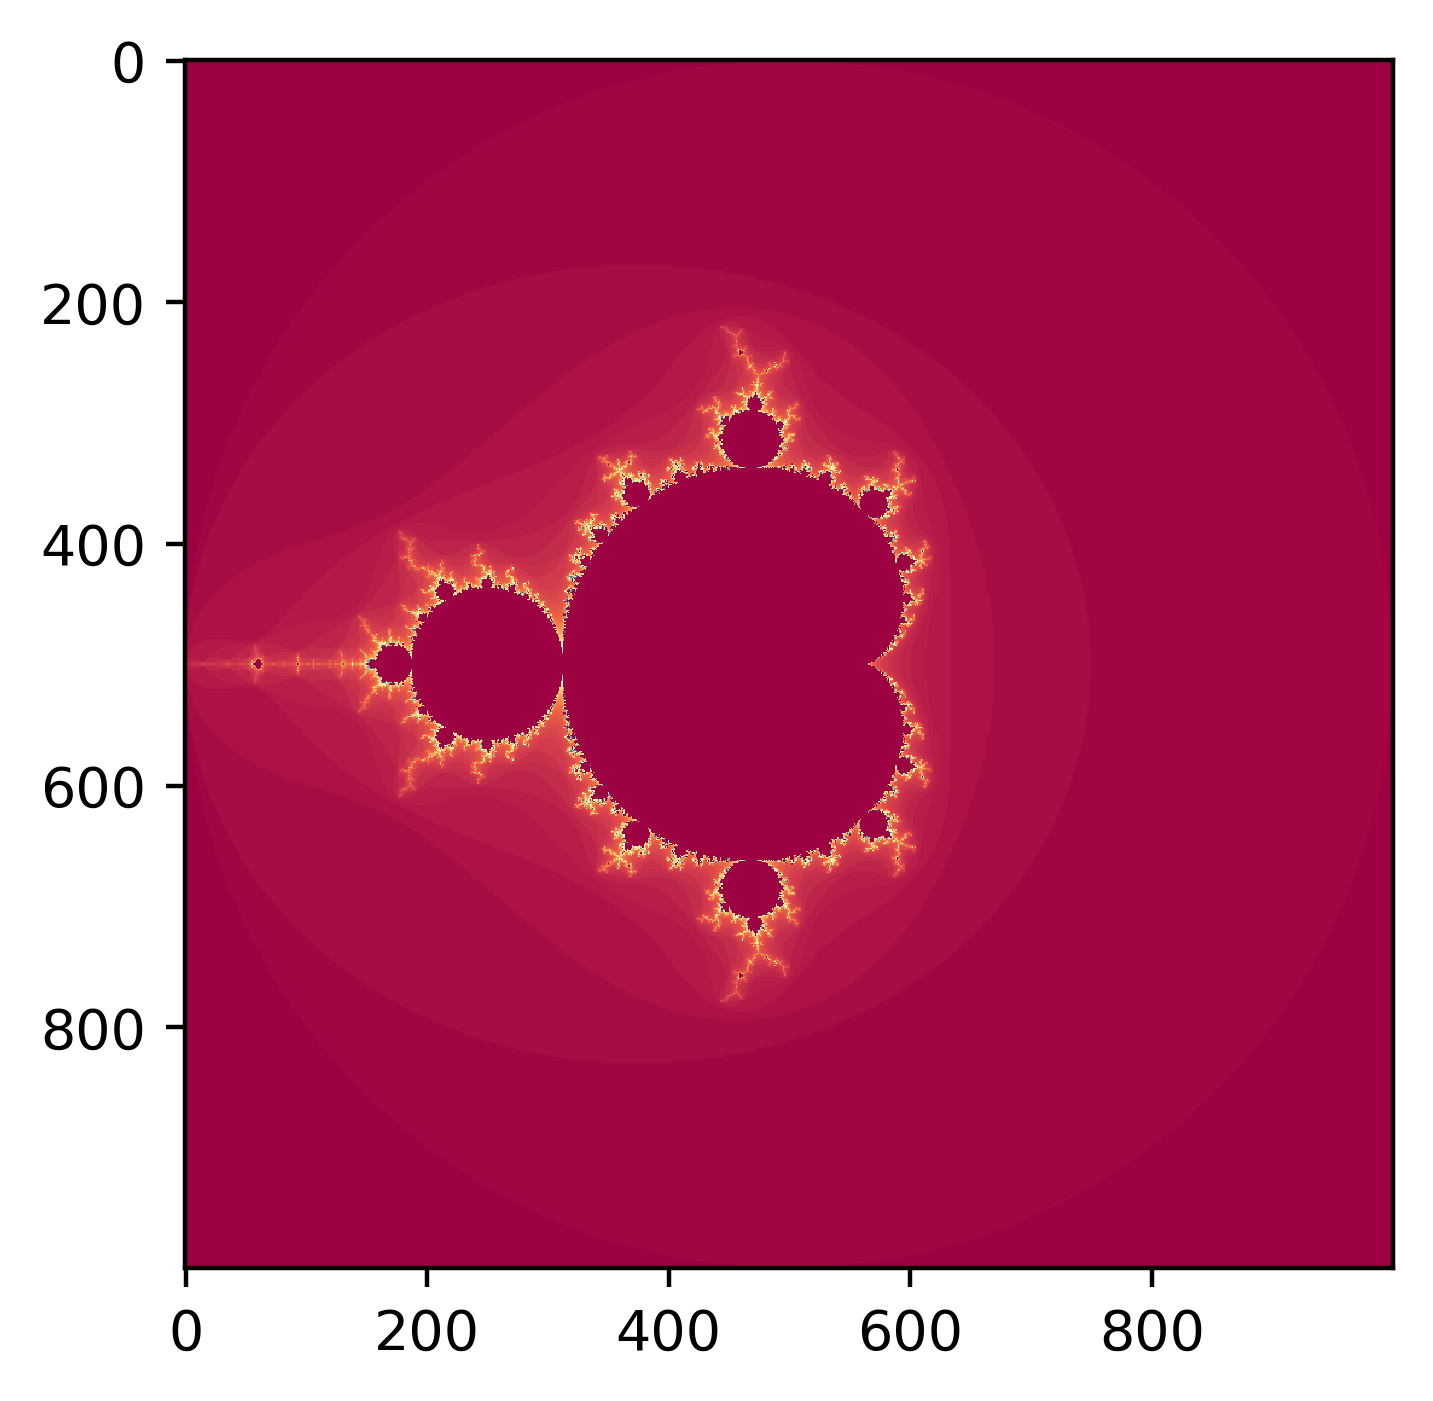

In [4]:
# Define a function that computes the mandelbrot set
def mandelbrot(real, imag, N):
    """This function takes in values for the real component of c, the 
    imaginary component of c, and the maximum number of iterations 
    N in order to return an integer value between 0 and N if it is not in the 
    mandelbrot set and N if it is in the set"""
    c = complex(real, imag)
    # start the iterations from z=0
    z = 0
    for i in range(N):
        z = z*z + c
        if abs(z) >= 2:
            return i
    return 0

# Create the dimensions of the grid
columns = 1000
rows = 1000

# Create an "empty" grid
image = np.zeros([rows, columns])

# define two arrays, later used for complex number
x = np.linspace(-2,2, num=rows)
y = np.linspace(-2,2, num=columns)

# iterate the mandelbrot set for every complex number combination of the arrays
for j in range(1,len(x)):
    for k in range (1,len(y)):
        # assign each mandelbrot output a pixel on the image
         image[j,k] = mandelbrot(x[j],y[k],100)

print(image.shape)
# plot the pixels/outputs        
plt.figure(dpi=400)
plt.imshow(image.T, cmap='Spectral')
plt.show()